In [1]:
# pie

In [2]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import re
import plotly.express as px
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

In [3]:
def describe_category_data_single_col(column):
    """

    :param column: pandas Series
    :return: DataFrame row: categories, columns: counts, percentiles(%)
    """
    c = column.value_counts(dropna=False)
    p = column.value_counts(dropna=False, normalize=True).map(lambda n: '{0:.2f} %'.format(n * 100))
    return pd.concat([c, p], axis=1, keys=['counts', 'percentiles(%)'])


In [6]:
df = pd.read_csv("dataset/titanic/train.csv")

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
describe_category_data_single_col(df["Sex"])

,counts,percentiles(%)
male,577,64.76 %
female,314,35.24 %


In [9]:
df_category = describe_category_data_single_col(df["Sex"])

In [20]:
trace = go.Pie(labels=df_category.index, values=df_category['counts'], title="Sex")

In [21]:
plot = make_subplots()

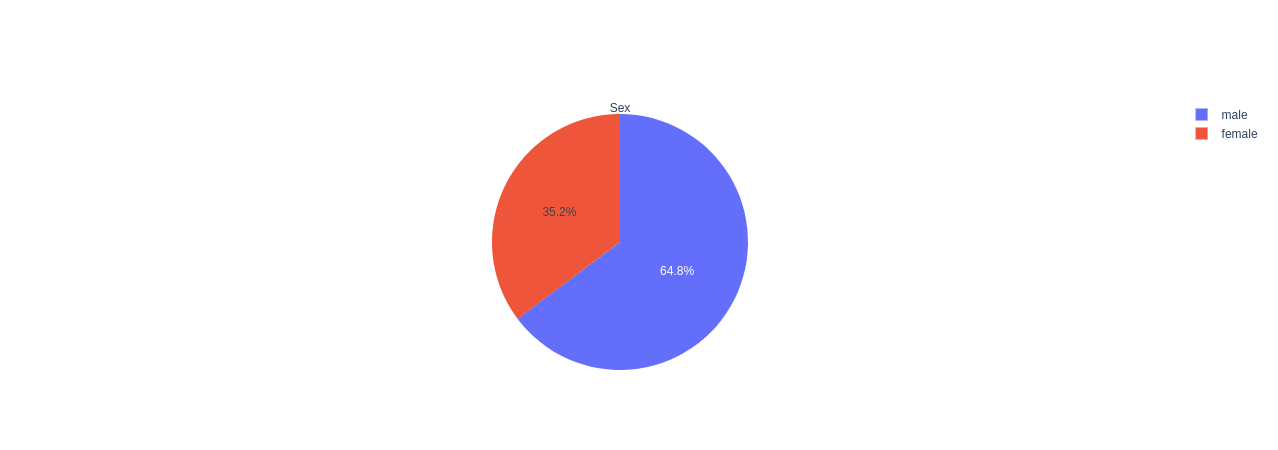

In [22]:
plot.add_trace(trace)